In [58]:
import csv
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [20]:
hot_songs=pd.read_csv('hot_100_features.csv')

In [21]:
hot_songs.head(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Popularity
0,0.5680,0.851,235545,0.541,0.00000,0,0.130,-6.825,1,0.0505,124.959,4,0.448,94
1,0.3490,0.511,239836,0.566,0.00000,6,0.340,-7.230,0,0.2000,83.903,4,0.218,97
2,0.3540,0.680,231267,0.563,0.00000,10,0.136,-5.843,1,0.0454,145.028,4,0.374,95
3,0.0589,0.835,217925,0.626,0.00006,1,0.396,-5.833,1,0.1250,91.030,4,0.350,100
4,0.0989,0.892,253580,0.651,0.00000,0,0.371,-8.645,0,0.3780,105.814,4,0.599,88


In [22]:
x=hot_songs.drop('Popularity',axis=1)


In [23]:
lm=LinearRegression()

In [24]:
lm.fit(x, hot_songs.Popularity)



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
len(lm.coef_)

13

In [27]:
print(lm.intercept_)

73.18292689096178


In [29]:
#p

In [30]:
print(x.columns)

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [31]:
print(lm.coef_)


[-2.33862150e+00  1.90126550e+01  1.06817283e-05 -4.11572905e+00
  4.02606931e+02 -2.67933563e-02  5.00068422e+00  8.89142522e-01
  1.10797637e+00  2.58818920e+00 -6.07929206e-02  4.01541428e+00
 -9.34596870e+00]


In [49]:
consolidate=dict(zip(x.columns,lm.coef_))


In [50]:
consolidate

{'acousticness': -2.3386214987591907,
 'danceability': 19.012655004882227,
 'duration_ms': 1.0681728251512457e-05,
 'energy': -4.1157290479602695,
 'instrumentalness': 402.6069311256557,
 'key': -0.026793356277624428,
 'liveness': 5.000684223182221,
 'loudness': 0.8891425218617325,
 'mode': 1.1079763731403331,
 'speechiness': 2.5881892025478748,
 'tempo': -0.060792920625805165,
 'time_signature': 4.015414279503415,
 'valence': -9.345968703565218}

In [56]:
linearDf=pd.DataFrame()
linearDf['Features']=consolidate.keys()
linearDf['Coefficient']=consolidate.values()

In [71]:
linearDf.head(10)

,Features,Coefficient
0,acousticness,-2.338621
1,danceability,19.012655
2,duration_ms,0.000011
3,energy,-4.115729
4,instrumentalness,402.606931
5,key,-0.026793
6,liveness,5.000684
7,loudness,0.889143
8,mode,1.107976
9,speechiness,2.588189


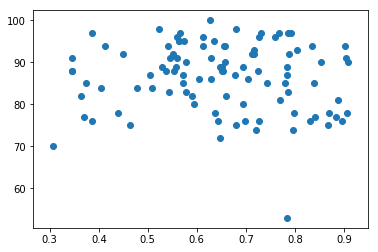

In [59]:
plt.scatter(hot_songs.energy,hot_songs.Popularity)

In [60]:
lm.predict(x)

array([88.42218929, 86.86671246, 85.62880511, 94.15147247, 89.11789055,
       90.62044314, 88.40574823, 90.60288688, 91.98633074, 87.54601999,
       92.33725854, 86.79037795, 87.96395398, 85.03610643, 88.01943969,
       93.84941639, 87.25245481, 89.20055049, 86.09493307, 85.87487924,
       88.23744777, 88.54239903, 87.77765484, 87.2652175 , 91.60561129,
       86.58713425, 83.68578647, 87.26885415, 89.05758965, 80.84363886,
       87.03212386, 87.46871161, 92.02845539, 88.08096817, 84.01538103,
       87.0991422 , 90.71583718, 89.36896655, 81.89373456, 88.05510078,
       91.74754519, 72.79392239, 88.59730103, 84.33508902, 91.55845464,
       85.79764047, 86.54965873, 81.28831576, 86.19894761, 84.25350164,
       85.06892083, 77.38992852, 83.28508372, 85.02204315, 75.71024949,
       89.57924257, 85.62880511, 87.19042773, 79.87875886, 85.64019005,
       84.19594334, 91.90812412, 85.42730518, 86.21645702, 89.57917827,
       89.0316331 , 84.54183753, 88.37491174, 83.76493467, 90.55

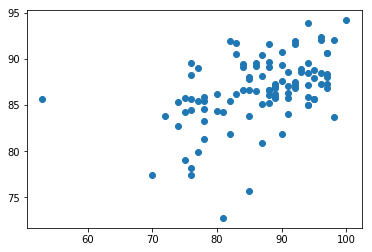

In [61]:
plt.scatter(hot_songs.Popularity,lm.predict(x))

In [67]:
hot_songs['Predicted Popularity']=lm.predict(x)

In [68]:
hot_songs.head(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Popularity,Predicted Popularity
0,0.5680,0.851,235545,0.541,0.00000,0,0.130,-6.825,1,0.0505,124.959,4,0.448,94,88.422189
1,0.3490,0.511,239836,0.566,0.00000,6,0.340,-7.230,0,0.2000,83.903,4,0.218,97,86.866712
2,0.3540,0.680,231267,0.563,0.00000,10,0.136,-5.843,1,0.0454,145.028,4,0.374,95,85.628805
3,0.0589,0.835,217925,0.626,0.00006,1,0.396,-5.833,1,0.1250,91.030,4,0.350,100,94.151472
4,0.0989,0.892,253580,0.651,0.00000,0,0.371,-8.645,0,0.3780,105.814,4,0.599,88,89.117891


In [69]:
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [70]:
lm.singular_

array([4.06903131e+05, 3.13460694e+02, 3.63782556e+01, 2.10835170e+01,
       4.52112328e+00, 2.05209827e+00, 1.78250645e+00, 1.45803220e+00,
       1.30149558e+00, 9.49326685e-01, 8.48193143e-01, 6.89132794e-01,
       1.36924725e-02])